In [1]:
import xarray as xr
import dask
import glob
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import datetime
import pickle
import pandas as pd
import itertools
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns
sns.set('notebook')

#import basemap
#fig sizes
Wf=(190/25.4)
Hf=(230/25.4)
Wf4=(95/25.4)
Hf4=(115/25.4)


In [2]:
# Plot timeseries of all the relevant variables

timeseries_vars = [
    'O2',
    'OmegaA',
    'T',
    # 'ALK_norm',
    # 'DIC_norm',
    # 'ALK',
    # 'DIC',
]


long_names = dict(
    O2=r"$\mathrm{O}_2$",
    OmegaA="$\Omega_A$",
    T="T"
    # ALK_norm="Normalized Alkalinity",
    # DIC_norm="Normalized DIC",
    # ALK="Alkalinity",
    # DIC="DIC",
)

units = dict(
    O2="mmol m$^{-3}$",
    OmegaA="(non-dimensional)",
    T="$^\circ$C",
    
    # ALK_norm="mmolk m$^{-3}$",
    # DIC_norm="mmolk m$^{-3}$",
    # ALK="mmolk m$^{-3}$",
    # DIC="mmolk m$^{-3}$"
)
color1='#00CD6C'#green
color2='#AF58BA'#purple
color3='#FFC61E' #yello
color4='#009ADE' #blue
color5='#F28522' #orange
color6='#A0B1BA' #gray
color7='#A6761D'#brown
color8='#FF1F5B' #red

In [3]:
df = pd.read_csv ('/gpfs/fs7/dfo/hpcmc/pfm/amh001/DATA/Climate-Indices/pdo.timeseries.ersstv5.csv')
Time=df.Date.values
PDO=df.PDO.values
TIME = [datetime.datetime.strptime(t0,'%Y-%m-%d') for t0 in Time[1:]] 
print(TIME[12*142-1], TIME[-36], np.shape(Time), np.shape(PDO))
datesPDO=TIME[12*142-1:-36]
dataPDO=PDO[12*142:-36]

1996-01-01 00:00:00 2020-01-01 00:00:00 (2028,) (2028,)


In [4]:
data=[]; count=0
with open('/gpfs/fs7/dfo/hpcmc/pfm/amh001/DATA/Climate-Indices/npgo.txt') as f:
    for line in f.readlines():
        l1=line.strip()
        l2=l1.split()
        count=count+1
        if count>30:
            try:
                #print(l2[0])
                year=int(float(l2[0]))
                #print(year)
                if (year >1995) & (year<2020):
                    #print(year)
                    #count=count+1
                    dat=float(l2[2])
                    #print((dat))

                    data.append(dat)
                    #print(data)
            except Exception as ex:
                print('exception', ex)
dataNPGO =np.array(data)
datesNPGO=pd.date_range(start="1996-01-01",end="2020-01-01", freq='M').values

exception could not convert string to float: '</pre>'
exception list index out of range
exception list index out of range
exception list index out of range
exception list index out of range
exception list index out of range
exception could not convert string to float: '</body></html>'


/tmp/ipykernel_55978/4062860804.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datesNPGO=pd.date_range(start="1996-01-01",end="2020-01-01", freq='M').values


In [5]:
dataM=[]; count=0
with open('/gpfs/fs7/dfo/hpcmc/pfm/amh001/DATA/Climate-Indices/meiv2.data') as f:
    for line in f.readlines():
        l1=line.strip()
        l2=l1.split()
        try:
            #print(l2)
            year=int(l2[0])
            #print(year)
            if (year >1995) & (year<2020):
                #print(year)
                count=count+1
                dat=[float(num) for num in l2[1:]]
                #print(len(dat))
                
                dataM.extend(dat)
        except:
            print('exception', l2)
dataM =np.array(dataM)
datesM=pd.date_range(start="1996-01-01",end="2020-01-01", freq='M')
#print(dates)

exception ['-999.00']
exception ['Multivariate', 'ENSO', 'Index', 'Version', '2', '(MEI.v2)']
exception ['https://www.psl.noaa.gov/enso/mei']
exception ['Row', 'values', 'are', '2', 'month', 'seasons', '(YEAR', 'DJ', 'JF', 'FM', 'MA', 'AM', 'MJ', 'JJ', 'JA', 'AS', 'SO', 'ON', 'ND)']


/tmp/ipykernel_55978/1121452055.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datesM=pd.date_range(start="1996-01-01",end="2020-01-01", freq='M')


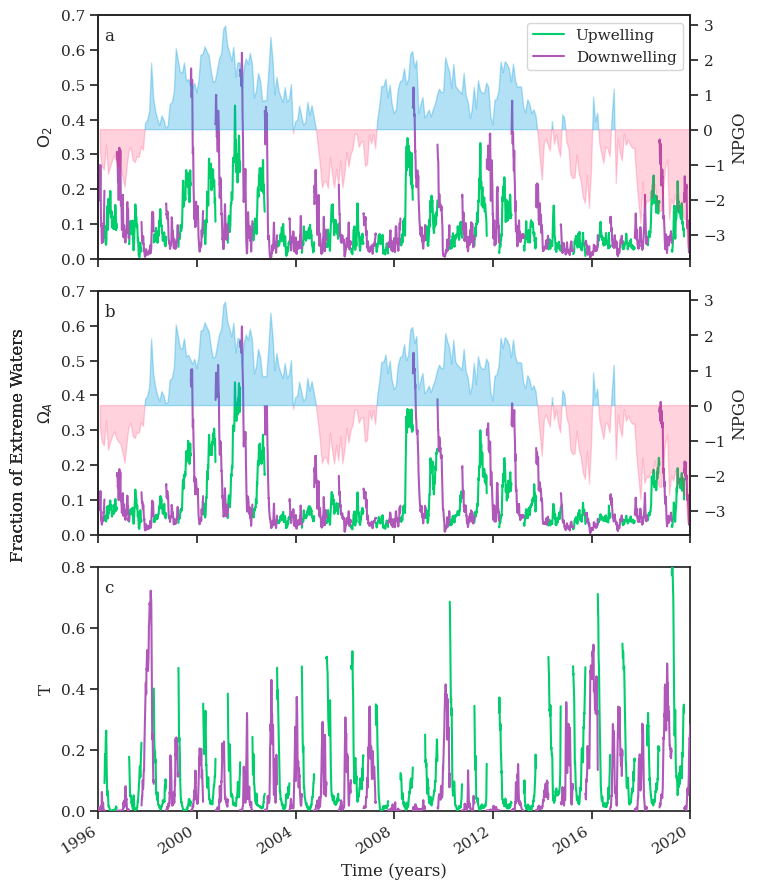

In [6]:
#sns.set('notebook')
sns.set_style('ticks')
at=0.01
bt=0.95
plt.rcParams["font.family"] = "Serif"

subpanel=['a', 'b', 'c', 'd', 'e', 'f']
colors=[color1, color2]
figprops = dict(figsize=(Wf,Hf))
fig = plt.figure(**figprops)
for idx, var in enumerate(timeseries_vars):
    ax = fig.add_subplot(3,1,idx+1)
    #fig, ax = plt.subplots(1,1, figsize = (Wf,Hf))
    for ii,label in enumerate(['Upwelling', 'Downwelling']):
        name0='pickles/'+label+'_0_'+var +'.pickle'
        with open(name0, 'rb') as fid:
            df = pickle.load(fid)
        color=colors[ii]
        for i, dfg in df.groupby('group'):
            if i==1:
                ax.plot(dfg['x'].values, dfg['y'].values, c=color, zorder=100, label=label)
            else:
                ax.plot(dfg['x'].values, dfg['y'].values, c=color, zorder=100)
                
    if idx==0:
        plt.legend()
    #plt.grid(axis='x')

            
    if idx==2:
        pass
    else:
        ax2 = ax.twinx()
        ax2.fill_between( datesNPGO,dataNPGO,np.zeros(len(dataNPGO)),where= dataNPGO<0,color=color8, alpha=0.2, interpolate=True, zorder=0)
        ax2.fill_between( datesNPGO,dataNPGO,np.zeros(len(dataNPGO)),where= dataNPGO>0,color=color4, alpha=0.3, interpolate=True, zorder=0)
        ##ax2.plot( datesNPGO,dataNPGO, color='0.5', alpha=1, linestyle=':')
        ax2.set_ylabel(r'NPGO')
    ax.set_ylabel(f'{long_names[var]}')

    if idx==2:
        ax.set_xlabel('Time (years)')
    else:
        ax.set_xticklabels([])
    for label in ax.get_xticklabels():
        label.set_rotation(32)
        label.set_horizontalalignment("right")
    plt.axis('tight')
    X=ax.get_xticks()
    plt.xlim([X[1], X[-2]]) 
    if idx==2:
        ax.set_ylim([0,0.8])
    else:
        ax.set_ylim([0,0.7])
    fig.text(0.0,0.5, "Fraction of Extreme Waters", ha="center", va="center", rotation=90)
    ax.text(at, bt, subpanel[idx], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)
    plt.tight_layout()
#plt.savefig('../Figures/Canyons_Extremes_NPGO.png', format='png', bbox_inches='tight',transparent=False,dpi=500)      

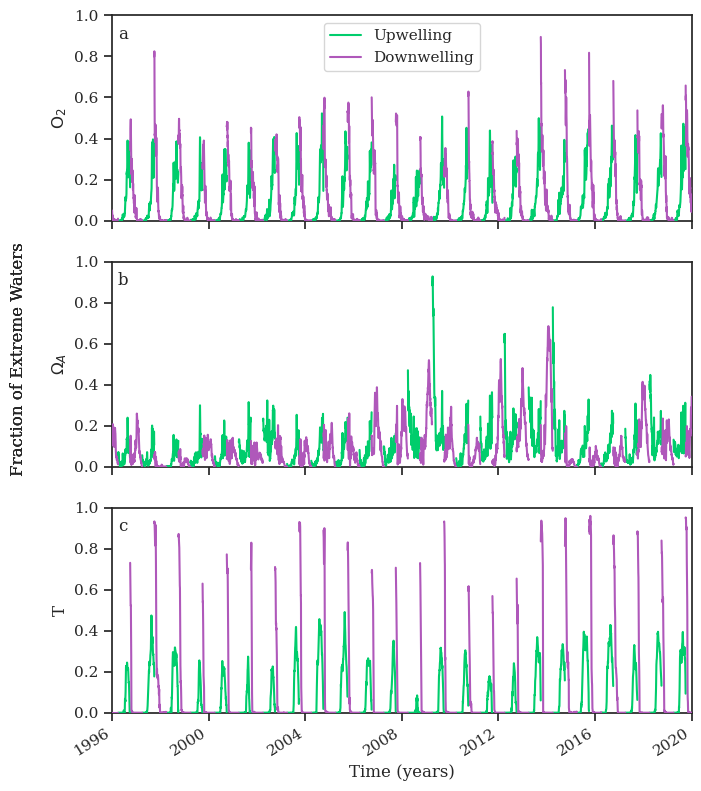

In [7]:
at=0.01
bt=0.95

#subpanel=['A', 'B', 'C', 'D', 'E']
colors=[color1, color2]
figprops = dict(figsize=(Wf,Hf))
fig = plt.figure(**figprops)
for idx, var in enumerate(timeseries_vars):
    ax = fig.add_subplot(3,1,idx+1)
    #fig, ax = plt.subplots(1,1, figsize = (Wf,Hf))
    for ii,label in enumerate(['Upwelling', 'Downwelling']):
        name0='pickles/'+label+'_3_'+var +'.pickle'
        with open(name0, 'rb') as fid:
            df = pickle.load(fid)
        color=colors[ii]
        for i, dfg in df.groupby('group'):
            if i==1:
                ax.plot(dfg['x'].values, dfg['y'].values, c=color, zorder=100, label=label)
            else:
                ax.plot(dfg['x'].values, dfg['y'].values, c=color, zorder=100)
    if idx==0:
        plt.legend()
        
    #ax2 = ax.twinx()
    #ax2.fill_between( datesNPGO,dataNPGO,np.zeros(len(dataNPGO)),where= dataNPGO<0,color=color8, alpha=0.1, interpolate=True, zorder=1)
    #ax2.fill_between( datesNPGO,dataNPGO,np.zeros(len(dataNPGO)),where= dataNPGO>0,color=color4, alpha=0.2, interpolate=True, zorder=1)
    #ax2.plot( datesNPGO,dataNPGO, color='0.5', alpha=1, linestyle=':')
    ax.set_ylabel(f'{long_names[var]}')
    if idx==2:
        ax.set_xlabel('Time (years)')
    else:
        ax.set_xticklabels([])
    for label in ax.get_xticklabels():
        label.set_rotation(32)
        label.set_horizontalalignment("right")
    plt.axis('tight')
    X=ax.get_xticks()
    plt.xlim([X[1], X[-2]])  
    ax.set_ylim([0,1])
    fig.text(0.0,0.5, "Fraction of Extreme Waters", ha="center", va="center", rotation=90)

    ax.text(at, bt, subpanel[idx], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)
plt.savefig('../Figures/Shallows_Extremes.png', format='png', bbox_inches='tight',transparent=False,dpi=500)

## Compound Extremes

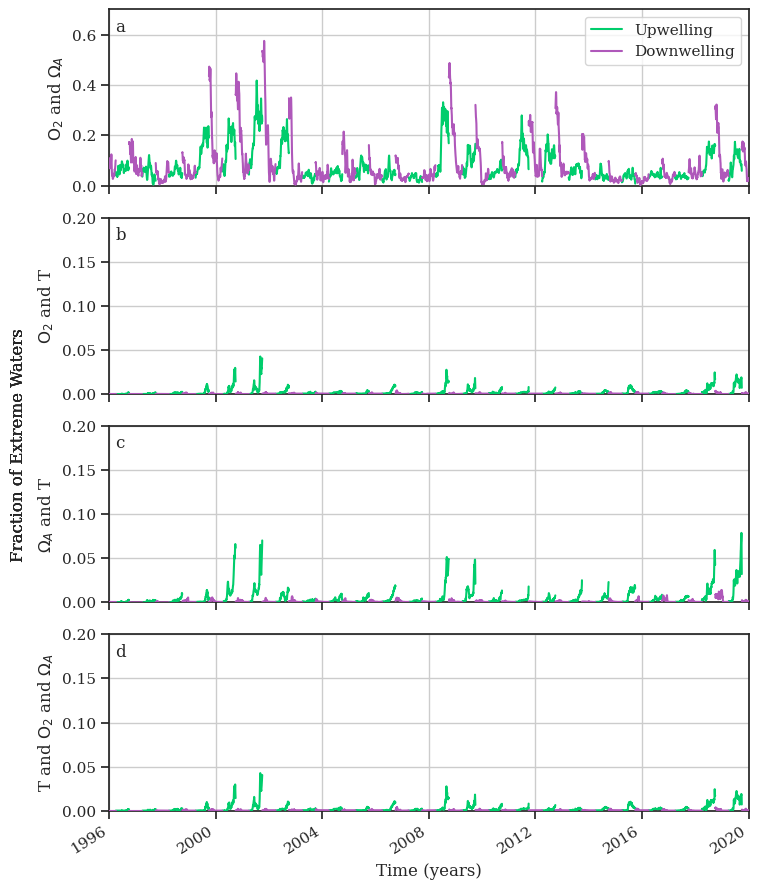

In [8]:

at=0.01
bt=0.95

dual_extreme = list(itertools.combinations(timeseries_vars, 2))
dual_extreme += [('T','O2','OmegaA')]
labelnames = [r'$\mathrm{O}_2$ and $\Omega_A$', r'$\mathrm{O}_2$ and T', r'$\Omega_A$ and T',r'T and $\mathrm{O}_2$ and $\Omega_A$']


#long_names0 = list(itertools.combinations(long_names, 2))


subpanel=['a', 'b', 'c', 'd', 'e', 'f']
colors=[color1, color2]
figprops = dict(figsize=(Wf,Hf))
fig = plt.figure(**figprops)
for idx, var in enumerate(dual_extreme):
    ax = fig.add_subplot(4,1,idx+1)
    #fig, ax = plt.subplots(1,1, figsize = (Wf,Hf))
    for ii,label in enumerate(['Upwelling', 'Downwelling']):
        name0='pickles/'+label+'_0_'+dual_extreme[idx][0]+dual_extreme[idx][1]+'.pickle'
        #name0=label+'_0'+var +'.pickle'
        with open(name0, 'rb') as fid:
            df = pickle.load(fid)
        color=colors[ii]
        for i, dfg in df.groupby('group'):
            if i==1:
                ax.plot(dfg['x'].values, dfg['y'].values, c=color, zorder=100, label=label)
            else:
                ax.plot(dfg['x'].values, dfg['y'].values, c=color, zorder=100)
    if idx==0:
        plt.legend()

            
    #if idx==2:
     #   pass
    #else:
        #ax2 = ax.twinx()
        #ax2.fill_between( datesNPGO,dataNPGO,np.zeros(len(dataNPGO)),where= dataNPGO<0,color=color8, alpha=0.1, interpolate=True, zorder=1)
        #ax2.fill_between( datesNPGO,dataNPGO,np.zeros(len(dataNPGO)),where= dataNPGO>0,color=color4, alpha=0.2, interpolate=True, zorder=1)
        #ax2.plot( datesNPGO,dataNPGO, color='0.5', alpha=1, linestyle=':')
        #ax2.set_ylabel(r'NPGO')
    ax.set_ylabel( labelnames[idx] )

    if idx==3:
        ax.set_xlabel('Time (years)')
    else:
        ax.set_xticklabels([])
    for label in ax.get_xticklabels():
        label.set_rotation(32)
        label.set_horizontalalignment("right")
    plt.axis('tight')
    X=ax.get_xticks()
    plt.xlim([X[1], X[-2]]) 
    if idx==0:
        ax.set_ylim([0,0.7])
    else:
        ax.set_ylim([0,0.2])
    ax.text(at, bt, subpanel[idx], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)
    fig.text(0.0,0.5, "Fraction of Extreme Waters", ha="center", va="center", rotation=90)
    plt.grid('on')

    plt.tight_layout()
plt.savefig('../Figures/Canyons_Compound_Extremes.png', format='png', bbox_inches='tight',transparent=False,dpi=500)      

In [9]:
print(dual_extreme)

[('O2', 'OmegaA'), ('O2', 'T'), ('OmegaA', 'T'), ('T', 'O2', 'OmegaA')]


In [10]:
labelnames = [r'$\mathrm{O}_2$ and $\Omega_A$', r'$\mathrm{O}_2$ and T', r'$\Omega_A$ and T',r'T, $\mathrm{O}_2$ and $\Omega_A$']
print(labelnames)

['$\\mathrm{O}_2$ and $\\Omega_A$', '$\\mathrm{O}_2$ and T', '$\\Omega_A$ and T', 'T, $\\mathrm{O}_2$ and $\\Omega_A$']


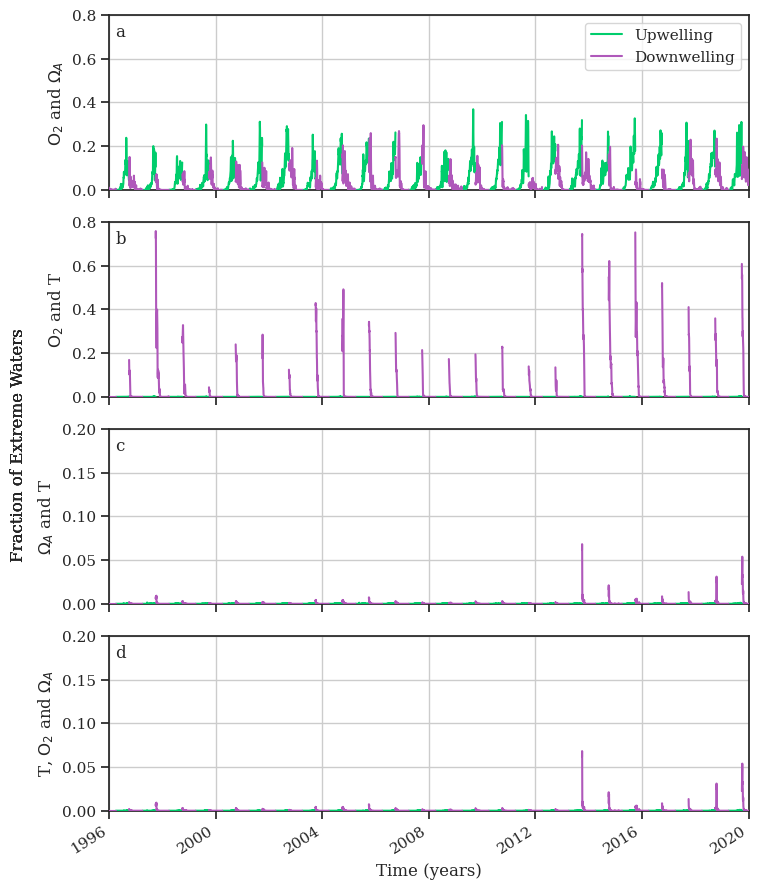

In [11]:
figprops = dict(figsize=(Wf,Hf))
fig = plt.figure(**figprops)
for idx, var in enumerate(dual_extreme):
    ax = fig.add_subplot(4,1,idx+1)
    #fig, ax = plt.subplots(1,1, figsize = (Wf,Hf))
    for ii,label in enumerate(['Upwelling', 'Downwelling']):
        name0='pickles/'+label+'_3_'+dual_extreme[idx][0]+dual_extreme[idx][1]+'.pickle'
        #name0=label+'_0'+var +'.pickle'
        with open(name0, 'rb') as fid:
            df = pickle.load(fid)
        color=colors[ii]
        for i, dfg in df.groupby('group'):
            if i==1:
                ax.plot(dfg['x'].values, dfg['y'].values, c=color, zorder=100, label=label)
            else:
                ax.plot(dfg['x'].values, dfg['y'].values, c=color, zorder=100)
    if idx==0:
        plt.legend()

            
    #if idx==2:
     #   pass
    #else:
        #ax2 = ax.twinx()
        #ax2.fill_between( datesNPGO,dataNPGO,np.zeros(len(dataNPGO)),where= dataNPGO<0,color=color8, alpha=0.1, interpolate=True, zorder=1)
        #ax2.fill_between( datesNPGO,dataNPGO,np.zeros(len(dataNPGO)),where= dataNPGO>0,color=color4, alpha=0.2, interpolate=True, zorder=1)
        #ax2.plot( datesNPGO,dataNPGO, color='0.5', alpha=1, linestyle=':')
        #ax2.set_ylabel(r'NPGO')
    ax.set_ylabel(labelnames[idx] )

    if idx==3:
        ax.set_xlabel('Time (years)')
    else:
        ax.set_xticklabels([])
    for label in ax.get_xticklabels():
        label.set_rotation(32)
        label.set_horizontalalignment("right")
    plt.axis('tight')
    X=ax.get_xticks()
    plt.xlim([X[1], X[-2]])  
    if idx==0 or idx==1:
        ax.set_ylim([0,0.8])
    else:
        ax.set_ylim([0,0.2])
    ax.text(at, bt, subpanel[idx], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)
    fig.text(0.0,0.5, "Fraction of Extreme Waters", ha="center", va="center", rotation=90)
    plt.grid('on')
    plt.tight_layout()
plt.savefig('../Figures/Shallows_Compound_Extremes.png', format='png', bbox_inches='tight',transparent=False,dpi=500)      

In [12]:

#colors =itertools.cycle(plt.get_cmap('magma')(np.linspace(0.2,0.8, 4)))


merged=[]
for idx, var in enumerate(dual_extreme[:]):
    #fig, ax = plt.subplots(1,1, figsize = (Wf,Hf))
    for ii,label in enumerate(['Upwelling', 'Downwelling']):
        name0='pickles/'+label+'_3_'+dual_extreme[idx][0]+dual_extreme[idx][1]+'_corr.pickle'
        print(name0)
        with open(name0, 'rb') as fid:
            df = pickle.load(fid)
        #print(df)
        #ax.scatter(df.time, df, label=label, s=2)
        if ii==0:
            upw=df.to_dataset(name='var', promote_attrs=True)   
        else:
            dwn=df.to_dataset(name='var', promote_attrs=True) 
    #color=colors[idx]#next(colors)
    merged.append(xr.merge([dwn,upw]))

pickles/Upwelling_3_O2OmegaA_corr.pickle
pickles/Downwelling_3_O2OmegaA_corr.pickle
pickles/Upwelling_3_O2T_corr.pickle
pickles/Downwelling_3_O2T_corr.pickle
pickles/Upwelling_3_OmegaAT_corr.pickle
pickles/Downwelling_3_OmegaAT_corr.pickle
pickles/Upwelling_3_TO2_corr.pickle
pickles/Downwelling_3_TO2_corr.pickle


In [13]:
# Initialize an empty list to store data for the DataFrame
data_frames = []

for idx, var in enumerate(dual_extreme[:]):
    for ii,label in enumerate(['Upwelling', 'Downwelling']):
        name0='pickles/'+label+'_3_'+dual_extreme[idx][0]+dual_extreme[idx][1]+'_corr.pickle'
        print(name0)
        with open(name0, 'rb') as fid:
            df = pickle.load(fid)
        #print(df)
        #ax.scatter(df.time, df, label=label, s=2)
        if ii==0:
            upw=df.to_dataset(name='var', promote_attrs=True)   
        else:
            dwn=df.to_dataset(name='var', promote_attrs=True) 
    
    merged_da = xr.merge([dwn,upw])
    #print(merged_da.time, merged_da)
    x=merged_da.time
    y=merged_da['var']
    # Store data in a DataFrame-friendly format
    temp_df = pd.DataFrame({
        'time': x.values,
        dual_extreme[idx][0]+dual_extreme[idx][1]: y.values,
    })
    
    data_frames.append(temp_df)

# Combine all individual DataFrames into a single DataFrame
final_df = pd.concat(data_frames, ignore_index=True)

# Save the combined DataFrame as a pickle file
with open('shallows_fig_p4.pickle', 'wb') as fid:
    pickle.dump(final_df, fid)
    
    

pickles/Upwelling_3_O2OmegaA_corr.pickle
pickles/Downwelling_3_O2OmegaA_corr.pickle
pickles/Upwelling_3_O2T_corr.pickle
pickles/Downwelling_3_O2T_corr.pickle
pickles/Upwelling_3_OmegaAT_corr.pickle
pickles/Downwelling_3_OmegaAT_corr.pickle
pickles/Upwelling_3_TO2_corr.pickle
pickles/Downwelling_3_TO2_corr.pickle


In [14]:
final_df

,time,O2OmegaA,O2T,OmegaAT,TO2
0,1996-01-01 12:00:00,0.010427,NaN,NaN,NaN
1,1996-01-02 12:00:00,0.008729,NaN,NaN,NaN
2,1996-01-03 12:00:00,0.003880,NaN,NaN,NaN
3,1996-01-04 12:00:00,0.001697,NaN,NaN,NaN
4,1996-01-05 12:00:00,0.000485,NaN,NaN,NaN
...,...,...,...,...,...
35059,2019-12-27 12:00:00,NaN,NaN,NaN,0.0
35060,2019-12-28 12:00:00,NaN,NaN,NaN,0.0
35061,2019-12-29 12:00:00,NaN,NaN,NaN,0.0
35062,2019-12-30 12:00:00,NaN,NaN,NaN,0.0


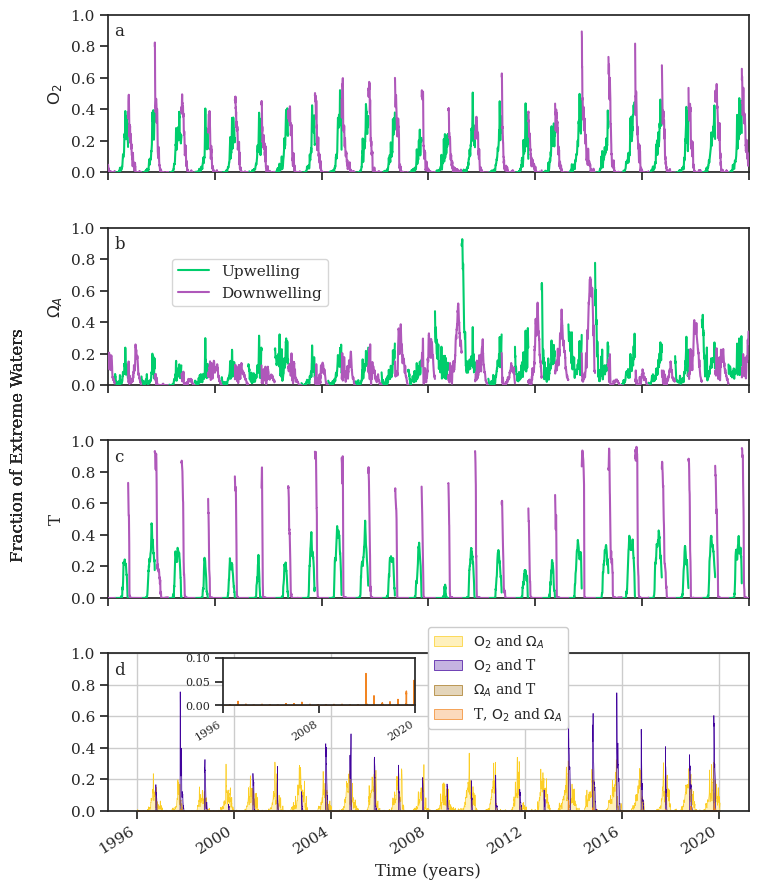

In [15]:
#sns.set('notebook')

from matplotlib.dates import DateFormatter

sns.set_style('ticks')
at=0.01
bt=0.95
plt.rcParams["font.family"] = "Serif"

subpanel=['a', 'b', 'c', 'd', 'e', 'f']
colors=[color1, color2]
figprops = dict(figsize=(Wf,Hf))
fig = plt.figure(**figprops)
for idx, var in enumerate(timeseries_vars):
    ax = fig.add_subplot(4,1,idx+1)
    #fig, ax = plt.subplots(1,1, figsize = (Wf,Hf))
    for ii,label in enumerate(['Upwelling', 'Downwelling']):
        name0='pickles/'+label+'_3_'+var +'.pickle'
        with open(name0, 'rb') as fid:
            df = pickle.load(fid)
        color=colors[ii]
        for i, dfg in df.groupby('group'):
            if i==1:
                ax.plot(dfg['x'].values, dfg['y'].values, c=color, zorder=100, label=label)
            else:
                ax.plot(dfg['x'].values, dfg['y'].values, c=color, zorder=100)

    #ax2.plot( datesNPGO,dataNPGO, color='0.5', alpha=1, linestyle=':')
    ax.set_ylabel(f'{long_names[var]}')
    ax.set_xticklabels([])
    for label in ax.get_xticklabels():
        label.set_rotation(32)
        label.set_horizontalalignment("right")
    plt.axis('tight')
    X=ax.get_xticks()
    plt.xlim([X[1], X[-2]])  
    ax.set_ylim([0,1])
    fig.text(0.0,0.5, "Fraction of Extreme Waters", ha="center", va="center", rotation=90)

    ax.text(at, bt, subpanel[idx], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)
    if idx==1:
        plt.legend(loc=(0.1,0.5))
colors =itertools.cycle(plt.get_cmap('plasma_r')(np.linspace(0.1,.9, 4)))
colora=next(colors)
colorb=next(colors)
colorc=next(colors)
colord=next(colors)
colors=[colora,colord, color7, color5]

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
ax = fig.add_subplot(4,1,4)

for idx, var in enumerate(dual_extreme[:]):
    y=final_df[dual_extreme[idx][0]+dual_extreme[idx][1]];x=final_df['time']
    color=colors[idx]

    color_a = mcolors.to_rgba(color, alpha=0.3)
    color=color_with_alpha = mcolors.to_rgba(color, alpha=1)
    ax.fill_between( x,y,np.zeros(len(merged_da)),facecolor=color_a,edgecolor=color, interpolate=True,  label=labelnames[idx], linewidth=0.5)
 
ax.set_xlabel('Time (years)')

for label in ax.get_xticklabels():
    label.set_rotation(32)
    label.set_horizontalalignment("right")
plt.axis('tight')
X=ax.get_xticks()
plt.xlim([X[1], X[-2]])  
#if idx==0 or idx==1:

#else:
#ax.set_ylim([0,0.2])
ax.text(at, bt, subpanel[3], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)
fig.text(0.0,0.5, "Fraction of Extreme Waters", ha="center", va="center", rotation=90)
#plt.grid('on')
# Customize legend appearance
legend = plt.legend(loc=(0.5,0.52), framealpha=1.0,fontsize=10)

#inset plot
# Add an inset plot
inset_ax = ax.inset_axes((0.18,.67,.3,.3) ) # Inset size and location
inset_x = x[2:8]
inset_y = y[2:8]
#inset_ax.plot(inset_x, inset_y, color="red", label="Inset Plot")
#inset_ax.set_title("Inset", fontsize=10)
inset_ax.tick_params(labelsize=8)
idx=3
#merged_da=merged[idx]
#print(merged_da.time, merged_da)
#x=merged_da.time
#y=merged_da['var']
color=colors[idx]
color_a = mcolors.to_rgba(color, alpha=0.3)
color=color_with_alpha = mcolors.to_rgba(color, alpha=1)
inset_ax.fill_between( x,y,np.zeros(len(merged_da)),facecolor=color_a,edgecolor=color,   label=labelnames[idx], linewidth=1)
#fig.text(0.0,0.5, "Fraction of Extreme Waters", ha="center", va="center", rotation=90)
plt.grid('on')

#inset_ax.set_xticklabels([])
for label in inset_ax.get_xticklabels():
    label.set_rotation(32)
    label.set_horizontalalignment("right")
plt.axis('tight')
X=inset_ax.get_xticks()
#if idx==0 or idx==1:
inset_ax.set_ylim([0,0.1])

xx = np.linspace(X[1],X[-2], 3)
#xx=[x.strftime("%Y-%m") for x in xx]
inset_ax.set_xticks(xx)
inset_ax.set_xlim([X[1], X[-2]])  

inset_ax.xaxis.set_major_formatter(DateFormatter("%Y"))  # Show only the year


ax.set_ylim([0,1.0])
plt.tight_layout()

plt.savefig('../Figures/Shallows_Extremes.png', format='png', bbox_inches='tight',transparent=False,dpi=500)      

In [16]:
print(xx)

[ 9496. 13879. 18262.]


In [17]:
X

array([ 8035.,  9496., 10957., 12418., 13879., 15340., 16801., 18262.,
       19723.])

In [18]:
# Initialize an empty list to store data for the DataFrame
data_frames = []

for idx, var in enumerate(dual_extreme[:]):
    for ii,label in enumerate(['Upwelling', 'Downwelling']):
        name0='pickles/'+label+'_0_'+dual_extreme[idx][0]+dual_extreme[idx][1]+'_corr.pickle'
        print(name0)
        with open(name0, 'rb') as fid:
            df = pickle.load(fid)
        #print(df)
        #ax.scatter(df.time, df, label=label, s=2)
        if ii==0:
            upw=df.to_dataset(name='var', promote_attrs=True)   
        else:
            dwn=df.to_dataset(name='var', promote_attrs=True) 
    
    merged_da = xr.merge([dwn,upw])
    #print(merged_da.time, merged_da)
    x=merged_da.time
    y=merged_da['var']
    # Store data in a DataFrame-friendly format
    temp_df = pd.DataFrame({
        'time': x.values,
        dual_extreme[idx][0]+dual_extreme[idx][1]: y.values,
    })
    
    data_frames.append(temp_df)

# Combine all individual DataFrames into a single DataFrame
final_df = pd.concat(data_frames, ignore_index=True)

# Save the combined DataFrame as a pickle file
with open('canyons_fig_p4.pickle', 'wb') as fid:
    pickle.dump(final_df, fid)
    
    

pickles/Upwelling_0_O2OmegaA_corr.pickle
pickles/Downwelling_0_O2OmegaA_corr.pickle
pickles/Upwelling_0_O2T_corr.pickle
pickles/Downwelling_0_O2T_corr.pickle
pickles/Upwelling_0_OmegaAT_corr.pickle
pickles/Downwelling_0_OmegaAT_corr.pickle
pickles/Upwelling_0_TO2_corr.pickle
pickles/Downwelling_0_TO2_corr.pickle


In [19]:
years = np.linspace(1996,2020, 3, dtype=int)
years

array([1996, 2008, 2020])

In [20]:
#from mpl_toolkits.axes_grid.inset_locator import inset_axes


/tmp/ipykernel_55978/1708413490.py:131: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


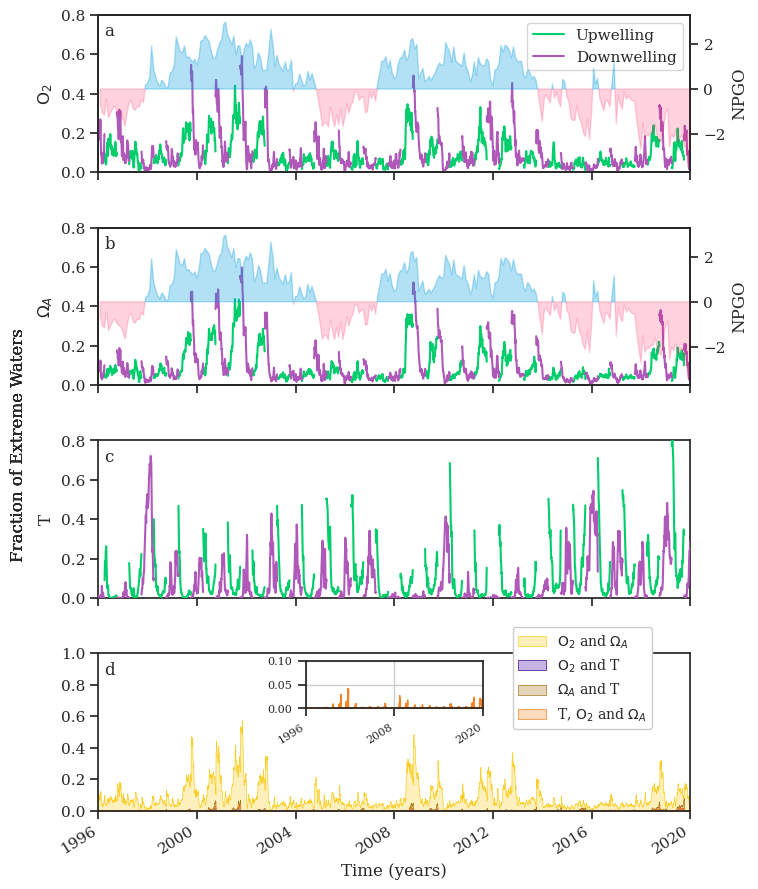

In [21]:
#sns.set('notebook')

sns.set_style('ticks')
at=0.01
bt=0.95
plt.rcParams["font.family"] = "Serif"

subpanel=['a', 'b', 'c', 'd', 'e', 'f']
colors=[color1, color2]
figprops = dict(figsize=(Wf,Hf))
fig = plt.figure(**figprops)
for idx, var in enumerate(timeseries_vars):
    ax = fig.add_subplot(4,1,idx+1)
    #fig, ax = plt.subplots(1,1, figsize = (Wf,Hf))
    for ii,label in enumerate(['Upwelling', 'Downwelling']):
        name0='pickles/'+label+'_0_'+var +'.pickle'
        with open(name0, 'rb') as fid:
            df = pickle.load(fid)
        color=colors[ii]
        for i, dfg in df.groupby('group'):
            if i==1:
                ax.plot(dfg['x'].values, dfg['y'].values, c=color, zorder=100, label=label)
            else:
                ax.plot(dfg['x'].values, dfg['y'].values, c=color, zorder=100)
                
    if idx==0:
        plt.legend()
    #plt.grid(axis='x')
    #plt.grid('on')

            
    if idx==2:
        pass
    else:
        ax2 = ax.twinx()
        ax2.fill_between( datesNPGO,dataNPGO,np.zeros(len(dataNPGO)),where= dataNPGO<0,color=color8, alpha=0.2, interpolate=True, zorder=0)
        ax2.fill_between( datesNPGO,dataNPGO,np.zeros(len(dataNPGO)),where= dataNPGO>0,color=color4, alpha=0.3, interpolate=True, zorder=0)
        ##ax2.plot( datesNPGO,dataNPGO, color='0.5', alpha=1, linestyle=':')
        ax2.set_ylabel(r'NPGO')
    ax.set_ylabel(f'{long_names[var]}')

    ax.set_xticklabels([])
    for label in ax.get_xticklabels():
        label.set_rotation(32)
        label.set_horizontalalignment("right")
    plt.axis('tight')
    X=ax.get_xticks()
    plt.xlim([X[1], X[-2]]) 
    if idx==2:
        ax.set_ylim([0,0.8])
    else:
        ax.set_ylim([0,0.8])
    fig.text(0.0,0.5, "Fraction of Extreme Waters", ha="center", va="center", rotation=90)
    ax.text(at, bt, subpanel[idx], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)

colors =itertools.cycle(plt.get_cmap('plasma_r')(np.linspace(0.1,.9, 4)))
colora=next(colors)
colorb=next(colors)
colorc=next(colors)
colord=next(colors)
colors=[colora,colord, color7, color5]

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
ax = fig.add_subplot(4,1,4)

for idx, var in enumerate(dual_extreme[:]):
    y=final_df[dual_extreme[idx][0]+dual_extreme[idx][1]];x=final_df['time']
    color=colors[idx]

    color_a = mcolors.to_rgba(color, alpha=0.3)
    color=color_with_alpha = mcolors.to_rgba(color, alpha=1)
    ax.fill_between( x,y,np.zeros(len(merged_da)),facecolor=color_a,edgecolor=color, interpolate=True,  label=labelnames[idx], linewidth=0.5)
 
ax.set_xlabel('Time (years)')
 


for label in ax.get_xticklabels():
    label.set_rotation(32)
    label.set_horizontalalignment("right")
plt.axis('tight')
X=ax.get_xticks()
plt.xlim([X[1], X[-2]])  
#if idx==0 or idx==1:
ax.set_ylim([0,1.0])
#else:
#ax.set_ylim([0,0.2])
ax.text(at, bt, subpanel[3], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)
fig.text(0.0,0.5, "Fraction of Extreme Waters", ha="center", va="center", rotation=90)
#plt.grid('on')
# Customize legend appearance
legend = plt.legend(loc=(0.7,0.52), framealpha=1.0, fontsize=10)

#inset plot
# Add an inset plot
inset_ax = inset_axes(ax, width="30%", height="30%", loc="upper center")  # Inset size and location
inset_x = x[2:8]
inset_y = y[2:8]
#inset_ax.plot(inset_x, inset_y, color="red", label="Inset Plot")
#inset_ax.set_title("Inset", fontsize=10)
inset_ax.tick_params(labelsize=8)
idx=3
#merged_da=merged[idx]
#print(merged_da.time, merged_da)
#x=merged_da.time
#y=merged_da['var']
color=colors[idx]
color_a = mcolors.to_rgba(color, alpha=0.3)
color=color_with_alpha = mcolors.to_rgba(color, alpha=1)
inset_ax.fill_between( x,y,np.zeros(len(merged_da)),facecolor=color_a,edgecolor=color,   label=labelnames[idx], linewidth=1)
#fig.text(0.0,0.5, "Fraction of Extreme Waters", ha="center", va="center", rotation=90)
plt.grid('on')

#inset_ax.set_xticklabels([])
for label in inset_ax.get_xticklabels():
    label.set_rotation(32)
    label.set_horizontalalignment("right")
plt.axis('tight')
xx = np.linspace(X[1],X[-2], 3)
#xx=[x.strftime("%Y-%m") for x in xx]
inset_ax.set_xticks(xx)
inset_ax.set_xlim([X[1], X[-2]])  

inset_ax.xaxis.set_major_formatter(DateFormatter("%Y"))  # Show only the year

 
#if idx==0 or idx==1:
inset_ax.set_ylim([0,0.1])


plt.tight_layout()

plt.savefig('../Figures/Canyons_Extremes_NPGO.png', format='png', bbox_inches='tight',transparent=False,dpi=500)      

In [22]:
print(plt.rcParams["legend.fontsize"])

11.0


In [23]:
print(labelnames)
#plt.plot(y)

['$\\mathrm{O}_2$ and $\\Omega_A$', '$\\mathrm{O}_2$ and T', '$\\Omega_A$ and T', 'T, $\\mathrm{O}_2$ and $\\Omega_A$']


In [24]:
name0='pickles/Upwelling_0_O2OmegaA_corr.pickle'
with open(name0, 'rb') as fid:
     df = pickle.load(fid)

In [25]:
final_df

,time,O2OmegaA,O2T,OmegaAT,TO2
0,1996-01-01 12:00:00,0.109905,NaN,NaN,NaN
1,1996-01-02 12:00:00,0.094005,NaN,NaN,NaN
2,1996-01-03 12:00:00,0.088633,NaN,NaN,NaN
3,1996-01-04 12:00:00,0.091427,NaN,NaN,NaN
4,1996-01-05 12:00:00,0.098947,NaN,NaN,NaN
...,...,...,...,...,...
35059,2019-12-27 12:00:00,NaN,NaN,NaN,0.000537
35060,2019-12-28 12:00:00,NaN,NaN,NaN,0.000430
35061,2019-12-29 12:00:00,NaN,NaN,NaN,0.000430
35062,2019-12-30 12:00:00,NaN,NaN,NaN,0.000430


In [ ]:
figprops = dict(figsize=(5,4))
fig = plt.figure(**figprops)
ax = fig.add_subplot(111)
ax.scatter(df.time, df, label=label, s=2, color=color)
plt.show()